In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("C:/Users/18573/Downloads/INFO 6105 DS EMT/Assignment/Assignment2/boston-housing.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [3]:
X = df[df.columns[df.columns != 'MV']]
y = df['MV']

In [4]:
print('Shape of Independent Variables: ', X.shape, '|| Shape of Target Variable: ', y.shape)

Shape of Independent Variables:  (506, 13) || Shape of Target Variable:  (506,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of Independent Variables (train): ', X_train.shape, '|| Shape of Target Variable (train): ', y_train.shape)
print('Shape of Independent Variables (test): ', X_test.shape, '|| Shape of Target Variable (test): ', y_test.shape)

Shape of Independent Variables (train):  (404, 13) || Shape of Target Variable (train):  (404,)
Shape of Independent Variables (test):  (102, 13) || Shape of Target Variable (test):  (102,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)

In [7]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 4.928601965955659


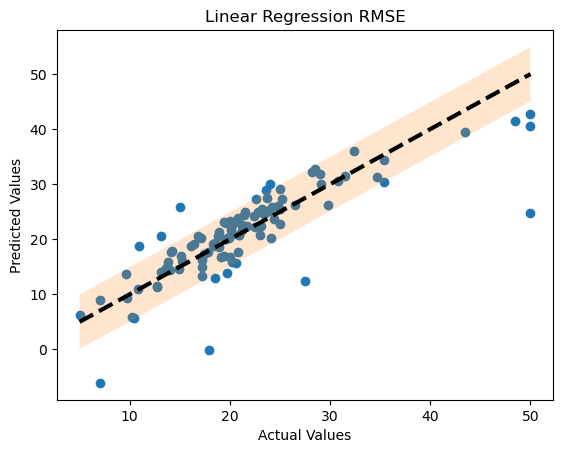

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression RMSE')
plt.fill_between([y_test.min(), y_test.max()], [y_test.min()-rmse, y_test.max()-rmse], [y_test.min()+rmse, y_test.max()+rmse], alpha=0.2)
plt.show()

In [9]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [10]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

num_round = 100

model = xgb.train(params, dtrain, num_round)

In [11]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.6956868146651685


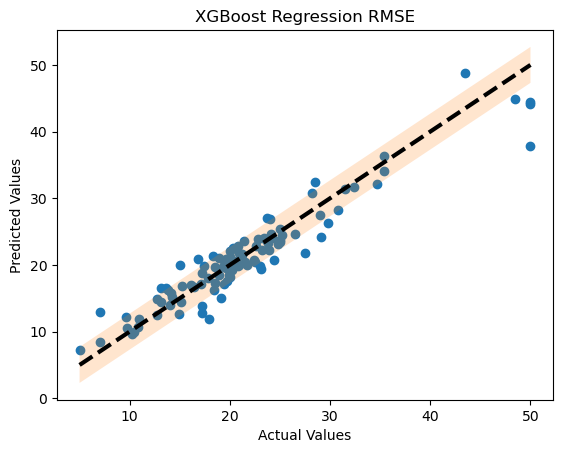

In [12]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression RMSE')
plt.fill_between([y_test.min(), y_test.max()], [y_test.min()-rmse, y_test.max()-rmse], [y_test.min()+rmse, y_test.max()+rmse], alpha=0.2)
plt.show()